In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import stringProcess as sp
from collections import defaultdict
import os

from sklearn.feature_extraction.text import TfidfVectorizer

# Set up TF-IDF

In [2]:
# create list with all the 24 books 
txtpath = os.getcwd() + '\\folder_with_books\\part2\\complete_book'
print(txtpath)
docs_unopened = []
for i in range(24):
    docs_unopened += [(txtpath + str(i+1).zfill(2) + '.txt')]
# docs_unopened
print(docs_unopened[0])
type(docs_unopened)
docs_unopened_set = set(docs_unopened)
type(docs_unopened_set)

C:\Users\User_E\OneDrive - University of Southampton\Data Mining - One Drive\folder_with_books\part2\complete_book
C:\Users\User_E\OneDrive - University of Southampton\Data Mining - One Drive\folder_with_books\part2\complete_book01.txt


set

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [open(f).read() for f in docs_unopened]
vectorizer = TfidfVectorizer(stop_words='english', min_df= 0.1)

X = vectorizer.fit_transform(corpus)
print(X.shape)
# print(vectorizer.get_feature_names())

(24, 43038)


# Find top and bottom scoring words

In [91]:
response = vectorizer.transform(corpus)
feature_array = np.array(vectorizer.get_feature_names())
tfidf_sorting = np.argsort(response.toarray()).flatten()[::-1]

feature_scores = feature_array[tfidf_sorting]



In [92]:
print('top 5', feature_scores[:20])
print('low 5', feature_scores[-20:])

top 5 ['herod' 'jews' 'great' 'king' 'men' 'did' 'antipater' 'sent' 'came'
 'city' 'chap' 'josephus' 'time' 'son' 'agrippa' 'come' 'said' 'caesar'
 'archelaus' 'people']
low 5 ['insensi' 'trespass' 'inregular' 'inquest' 'inquireinto' 'inquisi'
 'inquisition' 'inquisitors' 'trevisans' 'inreadiness' 'trevigo' 'tressed'
 'inroadsof' 'inrolled' 'insafety' 'insanity' 'insatiable' 'insatiate'
 'inscribedwith' 'imitatedthe']


## find scores for each doc

In [94]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [95]:
def top_feats_in_doc(X, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [96]:
# vec = vec_pipe.named_steps['vec']
features = vectorizer.get_feature_names()

In [97]:

top_feats_in_doc(X, features, 4, top_n=20)
    

,feature,tfidf
0,commons,0.240635
1,tribunes,0.191229
2,city,0.190765
3,time,0.189046
4,people,0.185179
5,rome,0.172615
6,enemy,0.165416
7,mould,0.153194
8,war,0.149948
9,having,0.139076


# LSA 

In [98]:
from sklearn.decomposition import TruncatedSVD
# we want A = U * S * V^T
LSA = TruncatedSVD(n_components =15 , n_iter = 10) # , n_iter = 100
LSA.fit(X)
var_explained = LSA.explained_variance_ratio_.sum()
print(var_explained)

0.8899717853465464


In [99]:
# Values for first row of V :
LSA.components_[0]

array([0.00260401, 0.00042664, 0.00085452, ..., 0.00018979, 0.00033386,
       0.00044959])

In [100]:
terms = vectorizer.get_feature_names()
for i, comp in enumerate(LSA.components_):
    termsInComp = zip(terms,comp)
    sortedTerms = sorted(termsInComp, key = lambda x: x[1], reverse=True)[:10]
    print("Book %d:" % (i+1))
    for term in sortedTerms:
        print(term[0])
    print(" ")

Book 1:
roman
time
war
city
people
men
great
rome
ii
king
 
Book 2:
empire
roman
justinian
lib
torn
emperor
constantinople
decline
belisarius
chap
 
Book 3:
rome
enemy
war
senate
consul
having
consuls
time
tribunes
book
 
Book 4:
ii
iii
athenians
peloponnesian
monians
called
war
strab
town
cf
 
Book 5:
cf
et
nero
book
tacitus
otho
vitellius
galba
annals
note
 
Book 6:
athenians
peloponnesian
cf
et
monians
nero
war
tacitus
otho
vitellius
 
Book 7:
cf
et
gold
silver
lib
note
sc
rings
minium
sec
 
Book 8:
gold
lib
silver
rings
minium
sec
copper
valpy
kind
nero
 
Book 9:
sulla
gaius
roman
gracchus
chap
julian
iv
marius
constantius
government
 
Book 10:
sulla
torn
gaius
mahomet
gracchus
lib
book
iv
caliph
marius
 
Book 11:
chap
justinian
belisarius
nero
lib
tom
book
chosroes
procopius
suet
 
Book 12:
otho
vitellius
history
livy
hannibal
samnites
galba
pretor
section
soldiers
 
Book 13:
otho
vitellius
tribunes
history
galba
section
sulla
book
torn
titus
 
Book 14:
nero
book
appen
suet
xvi
ge

# K means

In [101]:
from sklearn.cluster import KMeans

In [102]:
# Get the k-means model
X_LSA = LSA.fit_transform(X)

In [103]:
X_LSA.shape

(24, 15)

In [120]:
# takes donkey years - do not run again

Nc = range(3,10)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(X_LSA).score(X_LSA) for i in range(len(kmeans))]

score



[-9.311849556351756,
 -7.8985076636093705,
 -6.950280701856487,
 -5.7379748089925116,
 -4.767532179926646,
 -3.6635989931123323,
 -3.1838903801121443]

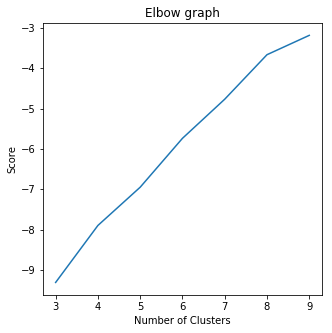

In [123]:
plt.figure(figsize=(5,5))
plt.plot(Nc[:],score[:])

plt.xlabel('Number of Clusters')
# plt.xticks([7,8,9,10,11])
plt.ylabel('Score')

plt.title('Elbow graph')
plt.show()

In [124]:
kmeans_new = KMeans(n_clusters=8).fit(X_LSA)
clusters = kmeans_new.labels_.tolist()
print(clusters)

[3, 6, 4, 1, 2, 0, 1, 3, 2, 2, 4, 1, 1, 2, 6, 0, 6, 2, 0, 7, 1, 5, 1, 0]


In [125]:
books = []
for i in range(24):
    books += ['book' + str(i+1).zfill(2)]
print(books)

['book01', 'book02', 'book03', 'book04', 'book05', 'book06', 'book07', 'book08', 'book09', 'book10', 'book11', 'book12', 'book13', 'book14', 'book15', 'book16', 'book17', 'book18', 'book19', 'book20', 'book21', 'book22', 'book23', 'book24']


In [126]:
# I want to create a table with the group and what groups are in it
def find_cluster(clusters,books,group_number):
    books_in_cluster = []
    indices = [i for i, x in enumerate(clusters) if x == group_number]
    for j in range(len(indices)):
        books_in_cluster += [books[indices[j]]]
    return books_in_cluster
        

In [127]:
cluster_set =[]
for i in range(8):
    if len(find_cluster(clusters,books,i)) != 0:
        cluster_set += [find_cluster(clusters,books,i)]
    else:
        break
print(cluster_set)

[['book06', 'book16', 'book19', 'book24'], ['book04', 'book07', 'book12', 'book13', 'book21', 'book23'], ['book05', 'book09', 'book10', 'book14', 'book18'], ['book01', 'book08'], ['book03', 'book11'], ['book22'], ['book02', 'book15', 'book17'], ['book20']]


In [128]:
print("Top terms per cluster:")
original_space_centroids = LSA.inverse_transform(kmeans_new.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]

cluster_words = []
terms = vectorizer.get_feature_names()
for i in range(8):
    print("Cluster %d:" % (i+1), end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], ',' ,end='')
    print()

Top terms per cluster:
Cluster 1: jews , herod , king , great , men , god , did , city , josephus , came ,
Cluster 2: roman , empire , chap , emperor , justinian , lib , torn , decline , constantinople , ofthe ,
Cluster 3: rome , roman , time , war , people , enemy , city , senate , romans , consul ,
Cluster 4: ii , iii , city , called , strab , son , place , town , iv , river ,
Cluster 5: athenians , peloponnesian , war , monians , time , athens , lacedaemonians , syracusans , hath , sea ,
Cluster 6: cf , et , sc , note , ut , ad , ch , nec , sed , ann ,
Cluster 7: nero , book , time , tacitus , men , germanicus , annals , otho , rome , tiberius ,
Cluster 8: gold , silver , lib , rings , minium , sec , copper , valpy , called , kind ,


In [130]:
top_feats_in_doc(X, features, 19, top_n=20)   

,feature,tfidf
0,gold,0.373167
1,silver,0.291300
2,lib,0.225343
3,rings,0.191177
4,minium,0.174169
5,sec,0.171806
6,copper,0.143383
7,valpy,0.138134
8,called,0.118735
9,kind,0.110254


# Find Simularities between books

In [131]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [132]:
from sklearn.metrics.pairwise import linear_kernel

def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [(index, cosine_similarities[index]) for index in related_docs_indices][0:top_n]

In [133]:
for j in range(24):
    print('for document', j+1)
    for index, score in find_similar(X_LSA, j):
        print(score, index +1)
    print('------------------')

for document 1
0.5785450884266795 8
0.4858660519273998 16
0.3778267751075643 7
0.3756886632290012 4
0.3600026044897707 9
------------------
for document 2
0.5612748134699534 17
0.5484586541280206 15
0.47564169845070275 10
0.4686753562350805 18
0.4608095922055456 14
------------------
for document 3
0.8581215265124582 11
0.3997235935276553 18
0.3495411770653842 10
0.3407820782322051 14
0.3288342126962353 16
------------------
for document 4
0.8362815657076712 13
0.6648826947817545 12
0.6445238355337732 7
0.6329113393126224 23
0.5486105766918644 21
------------------
for document 5
0.8622855970563752 14
0.7055073236305041 10
0.6453329728212204 18
0.5100963274475522 15
0.45435073899820005 9
------------------
for document 6
0.9028772305077934 24
0.8931457711116928 19
0.7976026438817816 16
0.42505117195151465 14
0.4132254846354382 18
------------------
for document 7
0.9007399137152085 23
0.8159569485497913 21
0.7962667564021036 12
0.6445238355337732 4
0.58883225542389 13
-----------------

# Multidemensional Scaling

In [135]:
dist = 1 - cosine_similarity(X_LSA)

In [136]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]


In [137]:
cluster_colors = {0: 'b', 1: 'g', 2: 'r', 3: 'c', 4:'tab:orange', 
                  5: 'y', 6: 'tab:pink', 7: 'm'}

#set up cluster names using a dict
cluster_names = {0: cluster_words[0], 
                 1: cluster_words[1], 
                 2: cluster_words[2], 
                 3: cluster_words[3], 
                 4: cluster_words[4],
                 5: cluster_words[5],
                 6: cluster_words[6], 
                 7: cluster_words[7]
                }

C:\Users\User_E\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\User_E\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


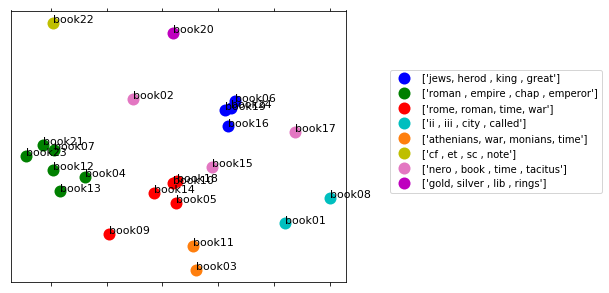

<Figure size 432x288 with 0 Axes>

In [138]:
%matplotlib inline 
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=books)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(10, 5)) # set size
ax.margins(0.05) # adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',         
        which='both',      
        bottom='on',      
        top='on',        
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         
        which='both',      
        left='off',      
        top='off',       
        labelleft='off')
    
    
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(numpoints=1,loc='upper center', bbox_to_anchor=(1.45, 0.8))  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=11)  

    
    
plt.show() #show the plot
#uncomment the below to save the plot if need be
plt.savefig('clusters_small_noaxes.jpg', dpi=200)

In [313]:

plt.close()

# Hierarchical Clustering

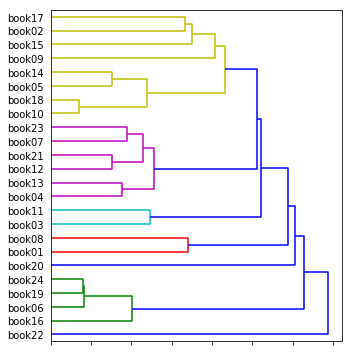

In [140]:

from scipy.cluster.hierarchy import ward,linkage, dendrogram

linkage_matrix = linkage(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(5, 5)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=books);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('linkage_clusters.png', dpi=200) #save figure as ward_clusters